In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _,filname in os.walk('/kaggle/input'):
    for filename in filname:
        print(os.path.join(dirname,filename))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set_style('whitegrid')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
print(df.shape)

(303, 14)


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df['target'].nunique()

2

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


univarient

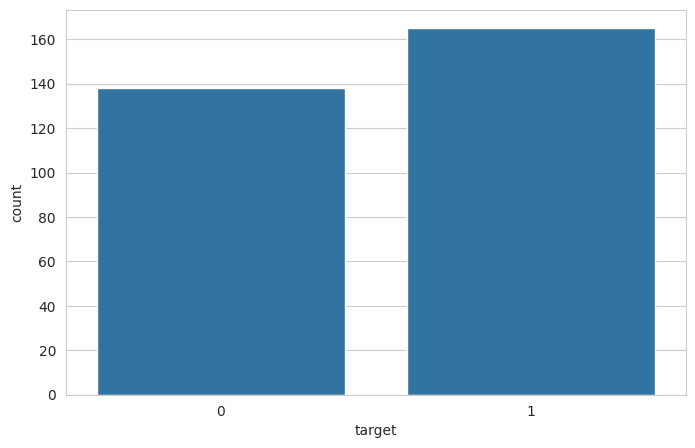

In [ ]:
f, ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='target',data=df)

In [ ]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

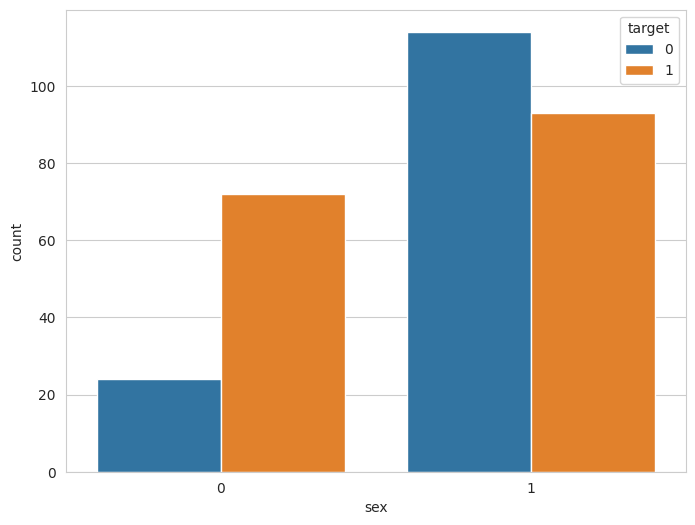

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='sex',hue='target',data=df)

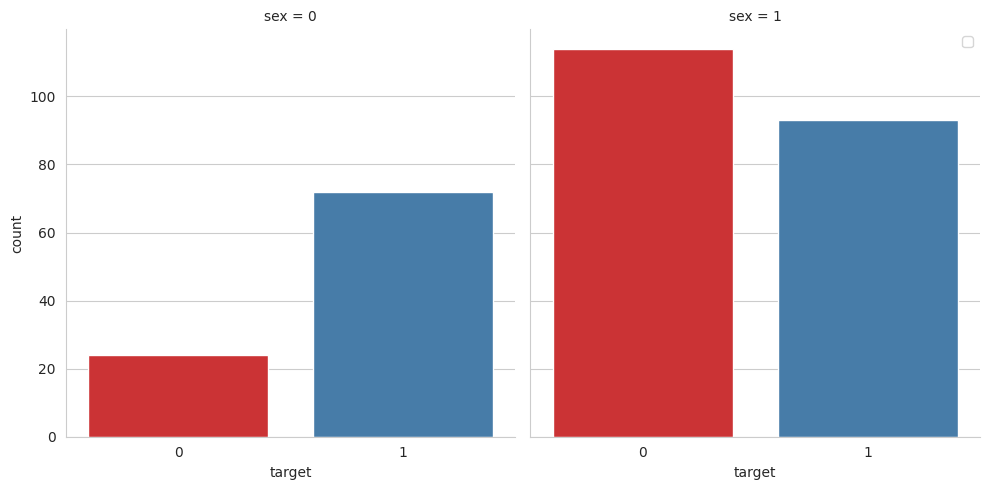

In [ ]:
ax = sns.catplot(x='target',col='sex',data=df,kind='count',height=5,aspect=1,palette='Set1')
plt.legend()

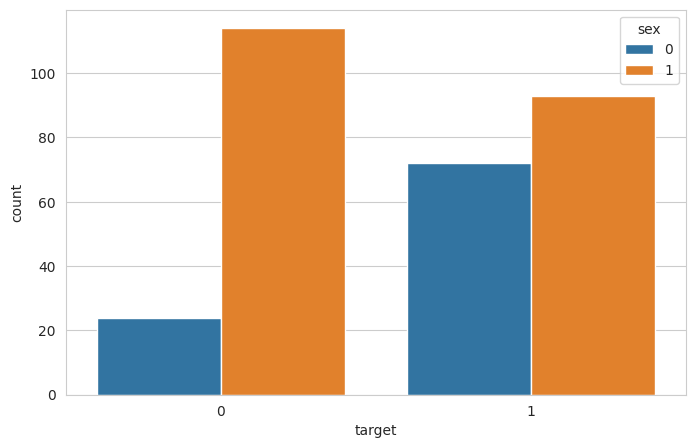

In [ ]:
f, ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='target',hue='sex',data=df)

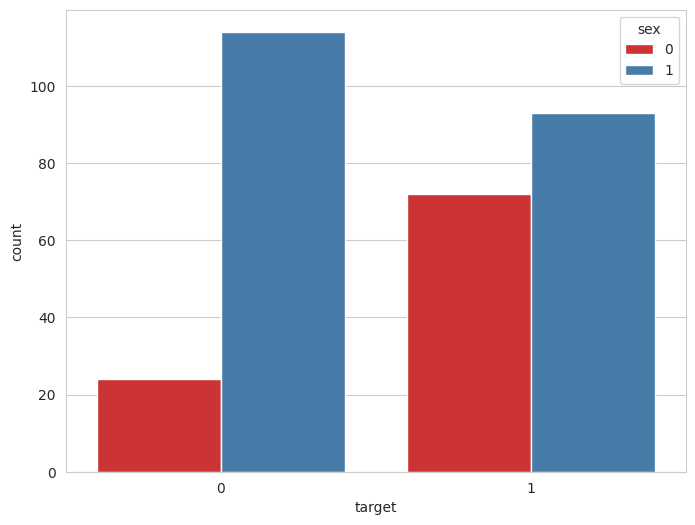

In [ ]:
f,ax =plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='sex',data=df,palette='Set1')

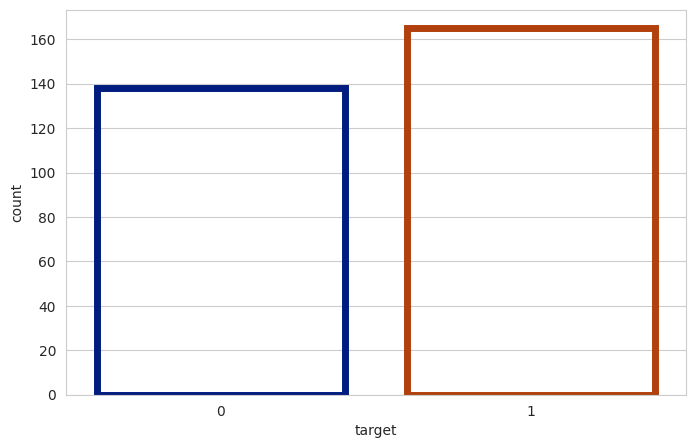

In [ ]:
f,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='target',data=df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))

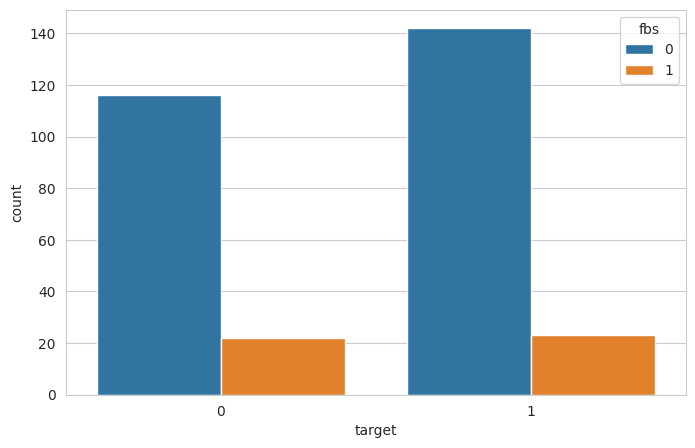

In [ ]:
f, ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='target',hue='fbs',data=df)

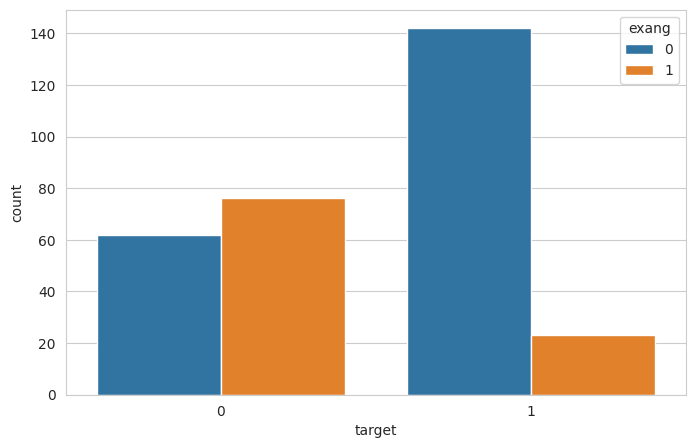

In [ ]:
f, ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='target',hue='exang',data=df)

bivarient

In [ ]:
correlation=df.corr()

In [ ]:
correlation['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


In [ ]:
df['cp'].nunique()

4

In [ ]:
df['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
df['cp'].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


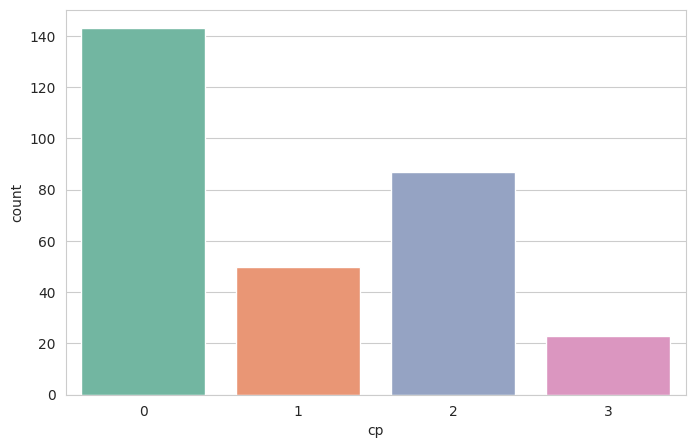

In [ ]:
f,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='cp',data=df,palette='Set2')

In [ ]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

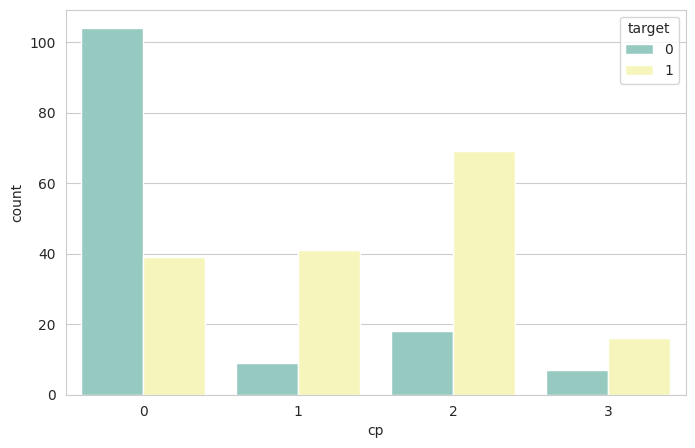

In [ ]:
f,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='cp',hue='target',data=df,palette='Set3')

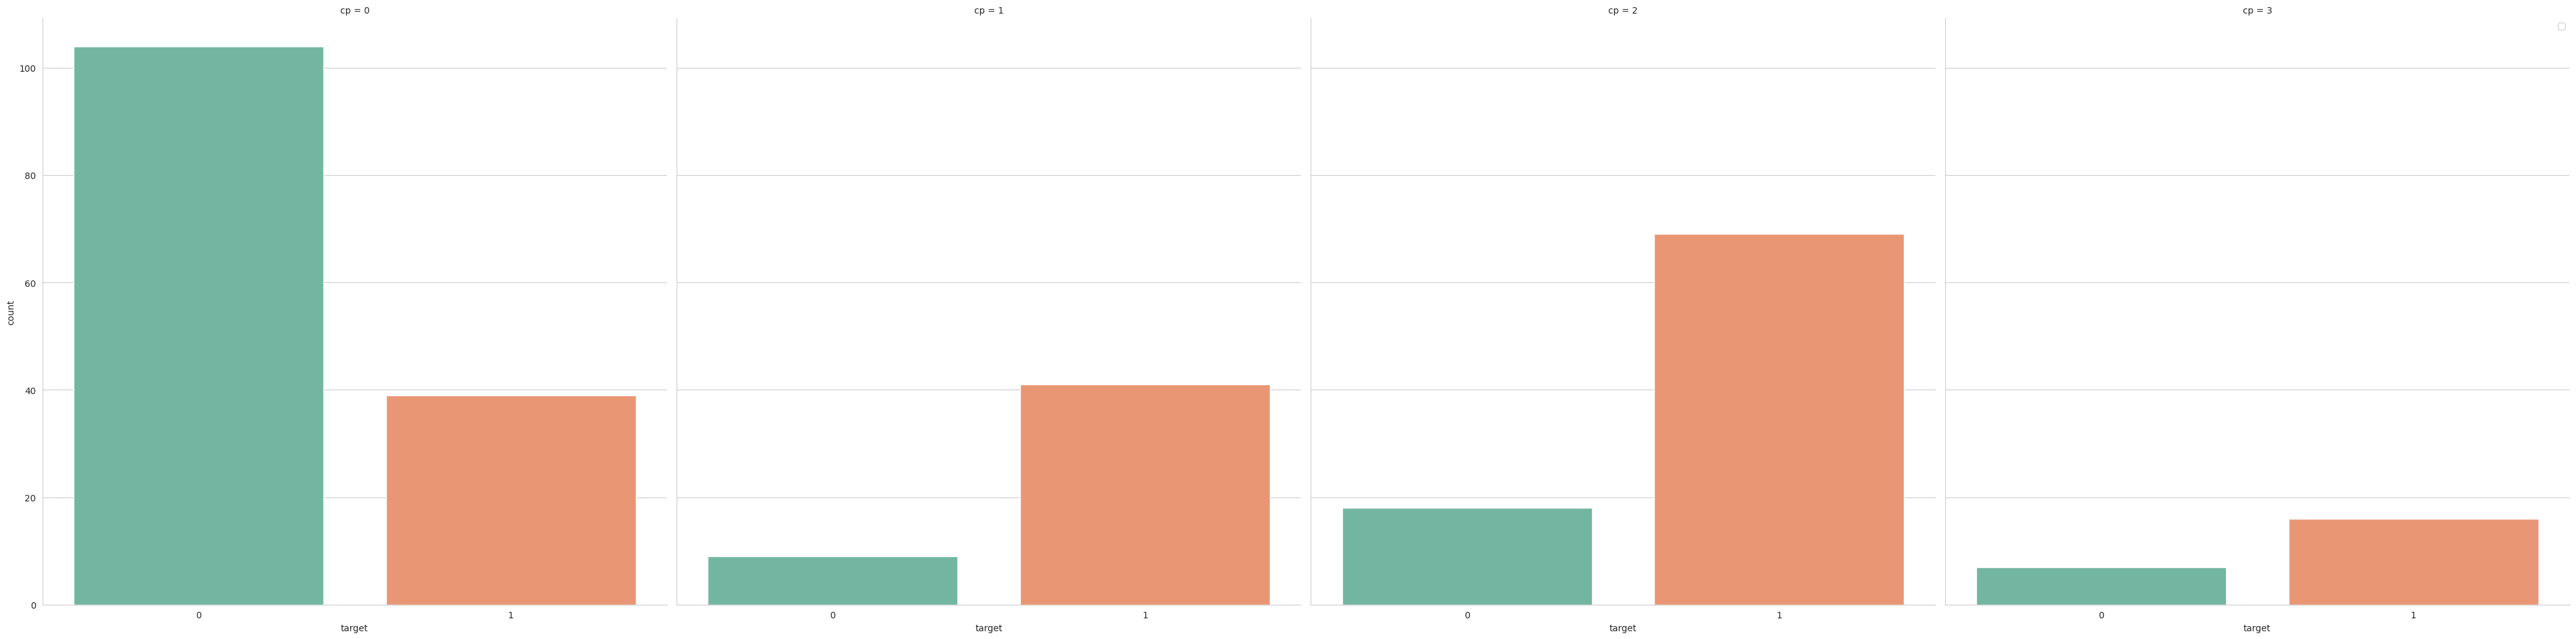

In [ ]:
ax=sns.catplot(x='target',col='cp',data=df,kind='count',height=10,aspect=1,palette='Set2')
plt.legend()

In [ ]:
df['thalach'].nunique()

91

In [ ]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

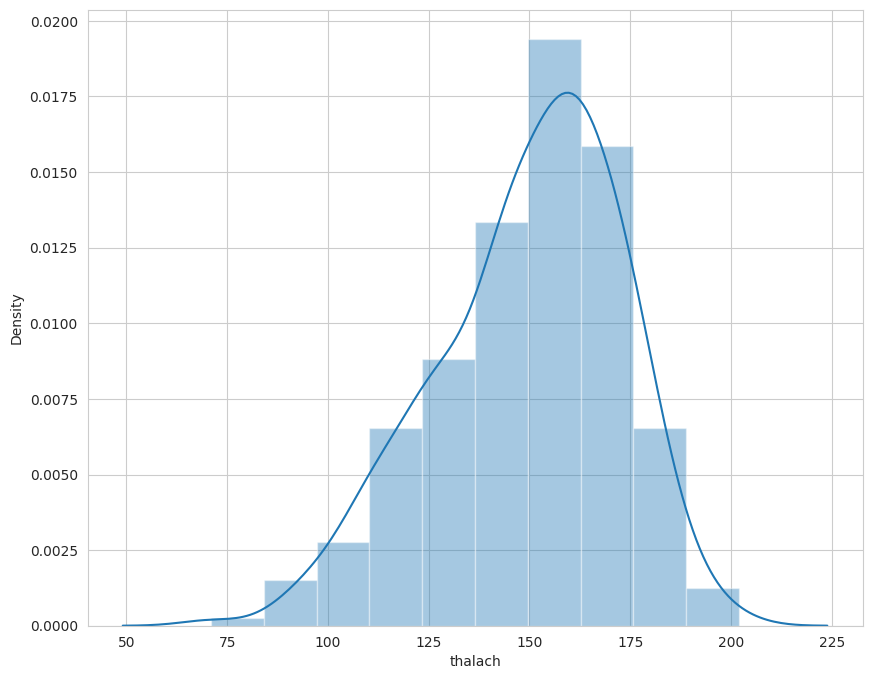

In [ ]:
f, ax=plt.subplots(figsize=(10,8))
x=df['thalach']
ax=sns.distplot(x,bins=10)

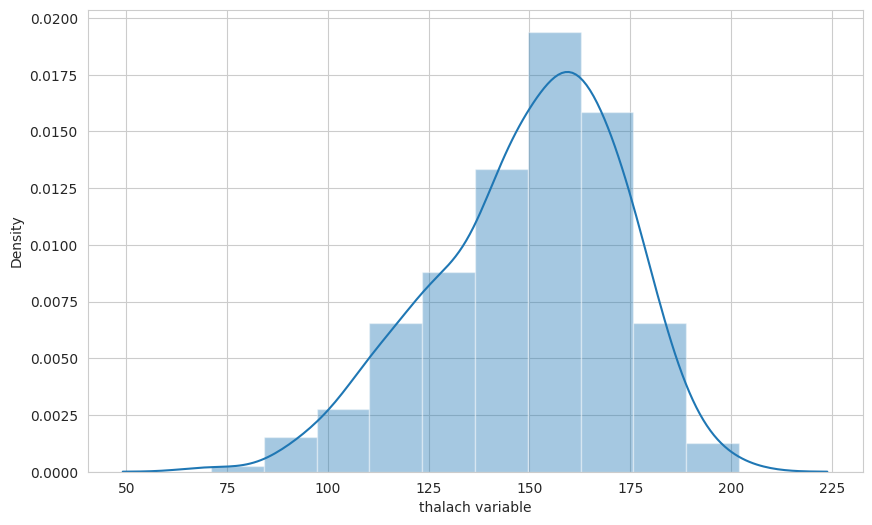

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.distplot(x,bins=10)

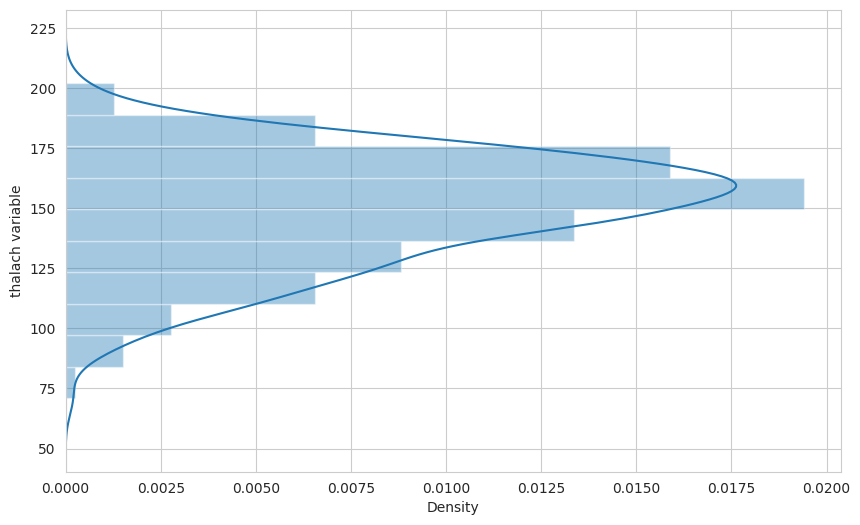

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.distplot(x,bins=10,vertical=True)

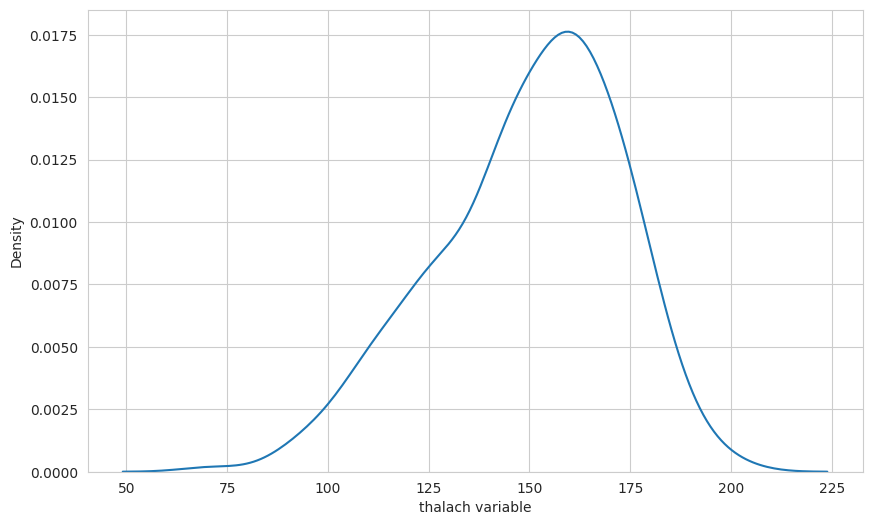

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x)

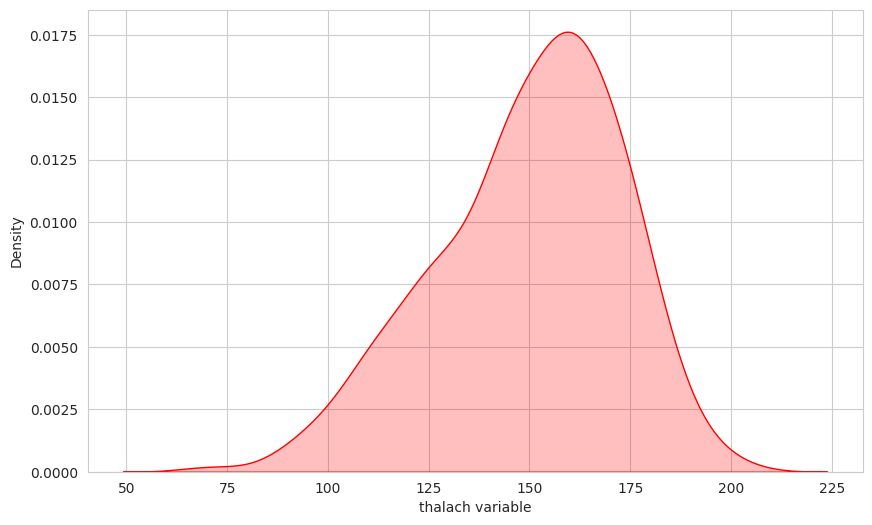

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x,shade=True,shade_lowest=False,color='r')

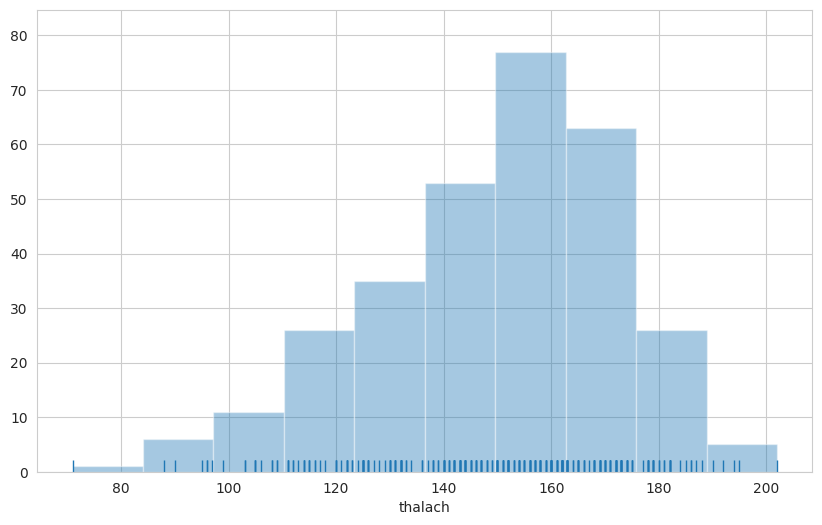

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)

<Axes: xlabel='target', ylabel='thalach'>

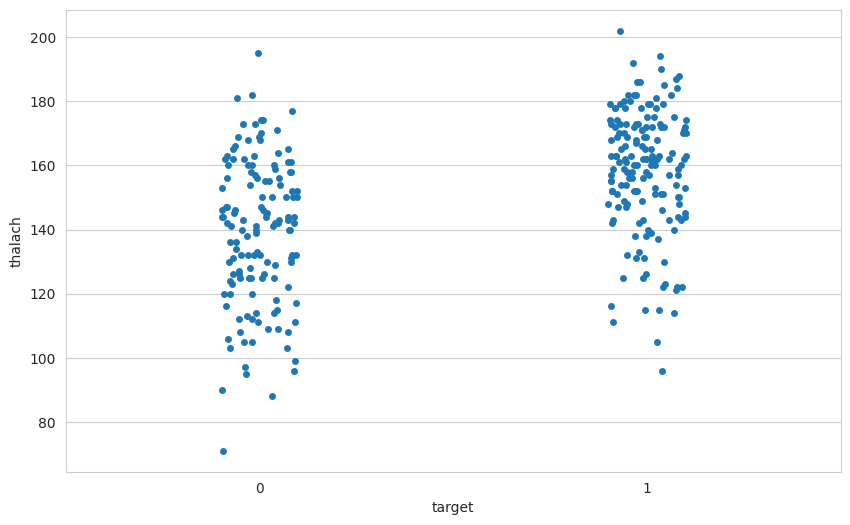

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df)

<Axes: xlabel='target', ylabel='thalach'>

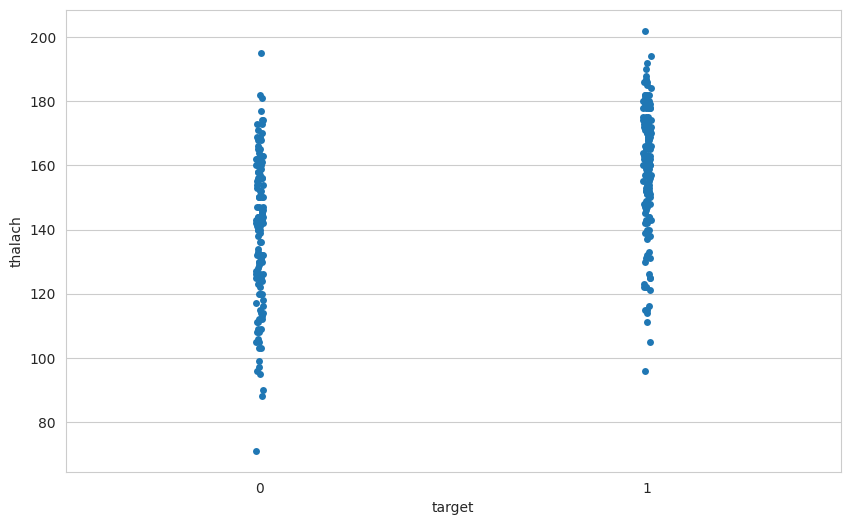

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df,jitter=0.01)

<Axes: xlabel='target', ylabel='thalach'>

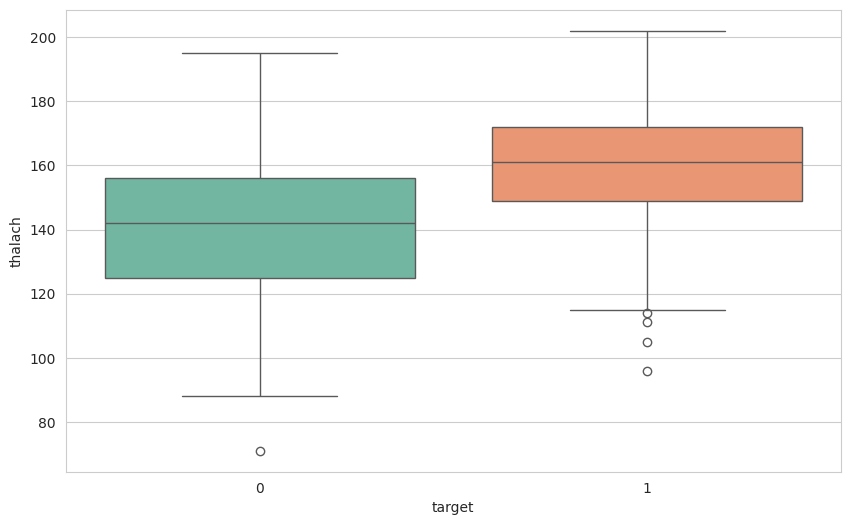

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='target',y='thalach',data=df,palette='Set2')

[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'sex'),
 Text(0, 2.5, 'cp'),
 Text(0, 3.5, 'trestbps'),
 Text(0, 4.5, 'chol'),
 Text(0, 5.5, 'fbs'),
 Text(0, 6.5, 'restecg'),
 Text(0, 7.5, 'thalach'),
 Text(0, 8.5, 'exang'),
 Text(0, 9.5, 'oldpeak'),
 Text(0, 10.5, 'slope'),
 Text(0, 11.5, 'ca'),
 Text(0, 12.5, 'thal'),
 Text(0, 13.5, 'target')]

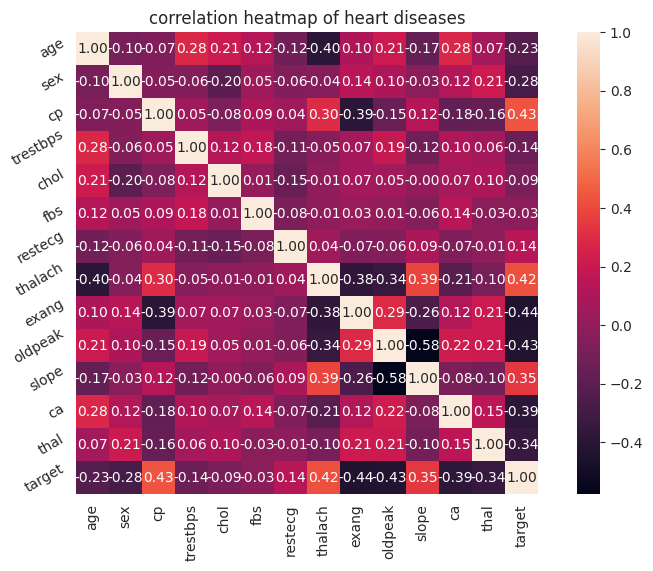

In [ ]:
plt.figure(figsize=(10,6))
plt.title('correlation heatmap of heart diseases')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)

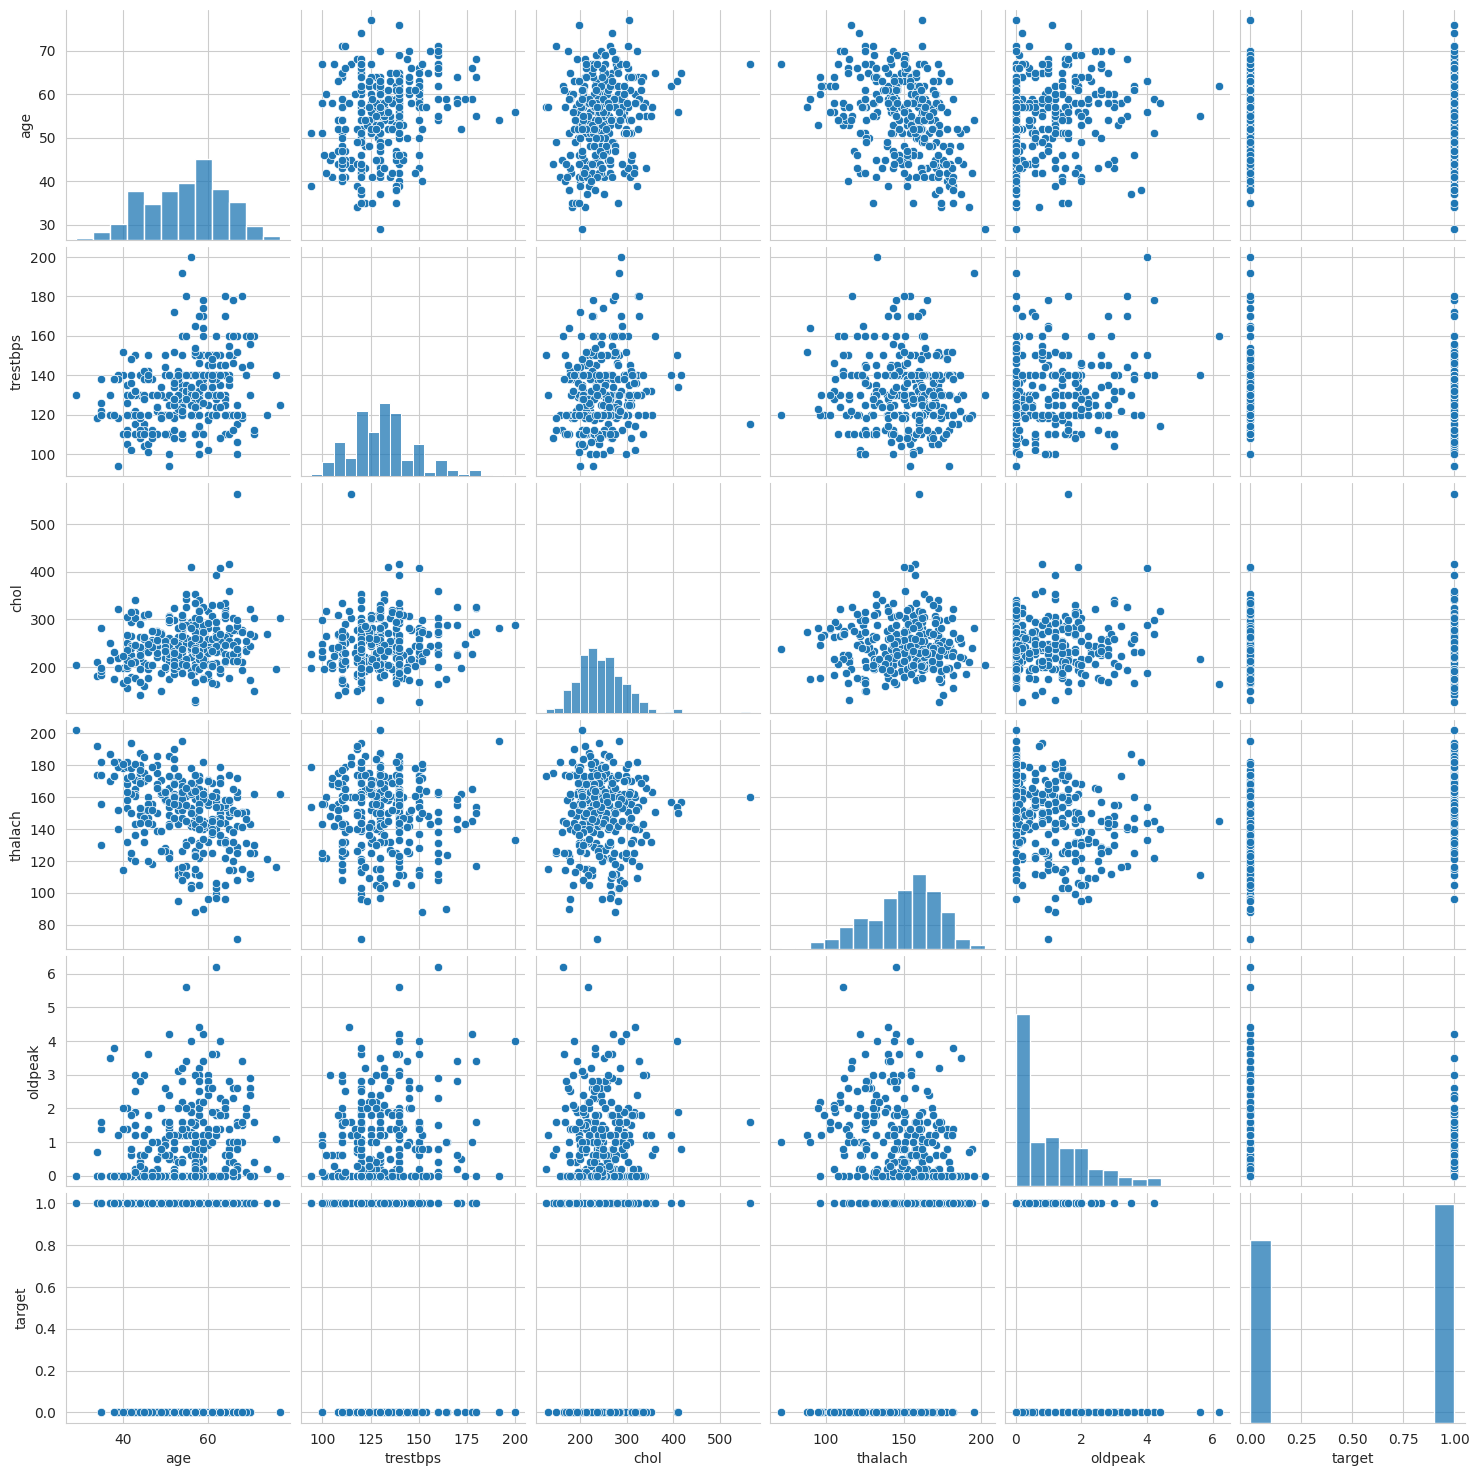

In [ ]:
num_var=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[num_var],kind='scatter',diag_kind='hist')

In [ ]:
df['age'].nunique()

41

In [ ]:
df['age'].describe()

,age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


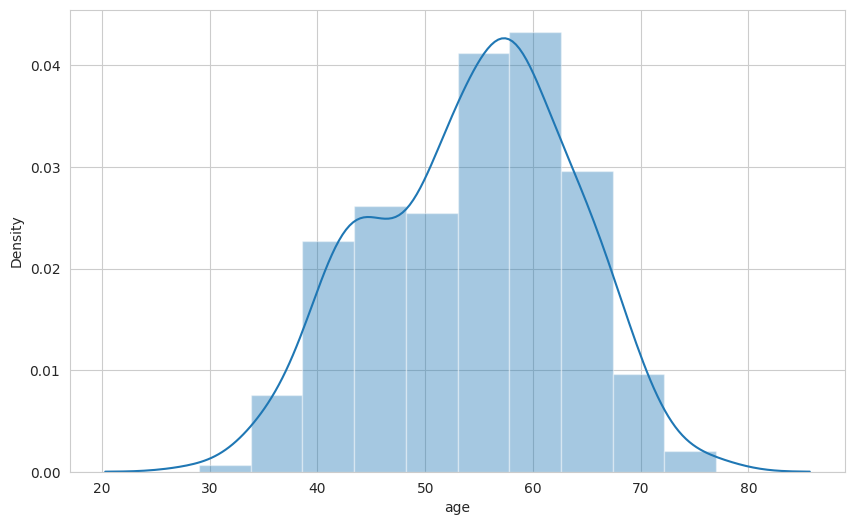

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
x=df['age']
ax=sns.distplot(x,bins=10)

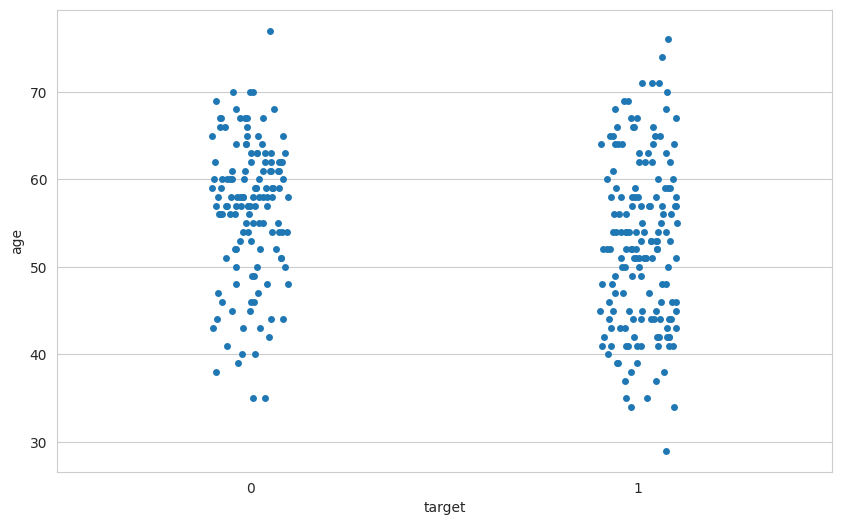

In [ ]:
f,ax=plt.subplots(figsize=(10,6))
ax=sns.stripplot(x='target',y='age',data=df)